In [33]:
import sys, os
import glob
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import * 
import warnings
warnings.filterwarnings('ignore')

In [34]:
subtype = 'HGG'

In [35]:
DATA = Path(f'/data-nas/brains/MICCAI_BraTS2018/interim/{subtype}')
SAVE_PATH = %pwd
SAVE_PATH = f'{SAVE_PATH}/saved_csv_files/'

In [36]:
studies_path = sorted(glob.glob(str(DATA)+'/*'))
total_studies = len(studies_path)

In [37]:
def unique_values(studies_path):
 
    count_values = {}
    data_list = []
    for path in studies_path:
        study_id = (path.split("/")[-1])
        imgfn = (path + "/"+ study_id +"_seg.nii.gz")
        
        img, rnx, rny, rnz, data, affine = load_nifti(imgfn)
        
        #np_arr = np.unique(data) #unqiue values in a matrix 
        unique_arr, counts_arr = np.unique(data, return_counts=True)

        for i in unique_arr: 
            if i in count_values: count_values[i] += 1 
            else: count_values[i] = 1
        data_list.append([unique_arr,counts_arr])
                
    return count_values, data_list

In [38]:
dic_classes, data_list = unique_values(studies_path)
dic_classes

{0: 210, 1: 210, 2: 210, 4: 210}

In [39]:
data_list[0][1]

array([8816276,   27189,   53050,   31485])

In [40]:
info = []
for img_info in data_list: 
    total_size = img_info[1].sum()
    total = 0
    save_info = {}
    for idx,cls in enumerate(img_info[0]): 
        class_size = img_info[1][idx]
        size_in_img = class_size/total_size
        total += size_in_img
        save_info[cls] = size_in_img
    info.append(save_info)

In [41]:
df = pd.DataFrame(info)
df['file_path'] = studies_path
df.head()

,0,1,2,4,file_path
0,0.987486,0.003045,0.005942,0.003527,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
1,0.984402,0.005134,0.008260,0.002204,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
2,0.976442,0.003847,0.014966,0.004745,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
3,0.997705,0.000046,0.001748,0.000500,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
4,0.978991,0.002366,0.014546,0.004097,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...


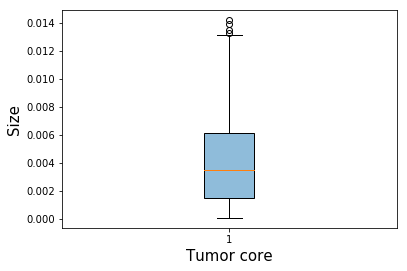

In [42]:
fig = plt.figure();
data = df[1] + df[4]
box_plot = plt.boxplot(data, patch_artist=True)
plt.xlabel('Tumor core', fontsize=15)
plt.ylabel('Size', fontsize=15)
colors = ['#8fbcda']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [70]:
fig.savefig('tumor_core.png', format='png', dpi=100)

In [71]:
df = pd.DataFrame(data)
df['file_path'] = studies_path

In [86]:
df.sort_values(by=[0], ascending=True).head()

,0,file_path
105,0.000063,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
123,0.000139,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
27,0.000153,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
65,0.000170,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...
63,0.000203,/data-nas/brains/MICCAI_BraTS2018/interim/HGG/...


In [88]:
df['file_path'][105]

'/data-nas/brains/MICCAI_BraTS2018/interim/HGG/Brats18_CBICA_BHB_1'

# Check depth

In [ ]:
def img_depth(studies_path):
 
    values = []
    for path in studies_path:
        study_id = (path.split("/")[-1])
        imgfn = (path + "/"+ study_id +"_seg.nii.gz")
        
        img, rnx, rny, rnz, data, affine = load_nifti(imgfn)
        depth = data.shape[2]
        values.append(depth)
    return values

In [ ]:
depth_values = img_depth(studies_path)

In [ ]:
np.unique(depth_values, return_counts=True)